<a href="https://colab.research.google.com/github/hincz-lab/motion-blur-microscopy/blob/main/Training_Walkthrough_Material/Complete_Training_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to the complete MBMA walkthrough. This Colab document is meant to help researchers learn how to train their own networks for analysis of MBM images or MBM videos on their own data sets. In this colab document, we will show you how we trained our phase one and phase two networks for analysis of MBM images. Specifically, this document will show you how to:

1. Train the phase 1 SN.
2. Train the phase 2 CN.
---

When you first take images or videos using MBM, the analysis process can be cumbersome, as counting hundred or thousands of cells takes time and energy. Thus, we have created motion blur microscopy with automated analysis (MBMA) to handle this process. 

---
Let's begin, first by cloning a directory to work in and importing necessary packages and libraries for the rest of the document. You will need to go into the next block of code by double clicking the "Show Code" button underneath the "Clone Github Repository" header. Please replace the code <token> with your personal access token. 

To generate a personal access token, in Github, click on your icon at the top right and choose settings, then click on developer settings, and finally, create a personal access token. So, its settings -> Developer Settings -> Personal Access Token (Classic).

After cloning the repository, you can see the repository in the "Files" section of Colab, located on the left-hand side of the screen.

In [ ]:
#@title Clone Github Repository
!git clone https://<token>@github.com/hincz-lab/motion-blur-microscopy.git

Cloning into 'motion-blur-microscopy'...
remote: Enumerating objects: 16707, done.
remote: Counting objects: 100% (4589/4589), done.
remote: Compressing objects: 100% (502/502), done.
remote: Total 16707 (delta 4161), reused 4490 (delta 4068), pack-reused 12118
Receiving objects: 100% (16707/16707), 114.58 MiB | 24.41 MiB/s, done.
Resolving deltas: 100% (7953/7953), done.


Let's import some useful libraries for this walkthrough now.

In [ ]:
#@title Importing Useful Libraries
import matplotlib.pyplot as plt
import os as os


Let's now take a look at the analysis workflow.

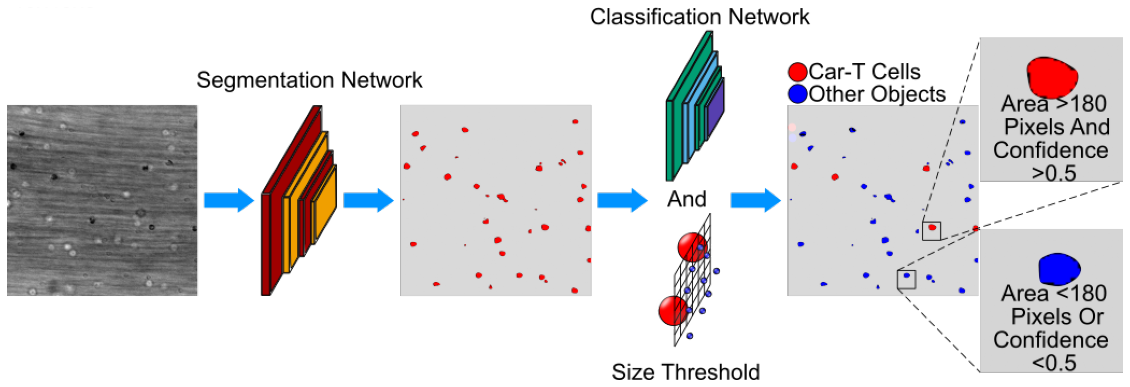

In [ ]:
#@title Show Analysis Steps
width = 20
height = 20
plt.figure(figsize = (width,height))
plt.imshow(plt.imread("motion-blur-microscopy/Training_Walkthrough_Material/Walkthrough_Figures/Figure_SI3.png")[325:1000,0:])
plt.axis("off")
plt.show()

Note in particular the phase one segmentation network, and the phase two classification network. These two pieces are the objects of interest in this Colab document. We will train both of these networks.

Let's now prepare our data for training of the phase one segmentation network.

# Phase One Training

## Section 1.1: Creating training images for SN training.

Our first goal is to prepare input data to be used for training the phase one SN. We will train two SNs in this exercise, one for analysis of sRBC adhesion to laminin, and one for analysis of Car-T cell adhesion to E-Selectin. Generally speaking, you want to have one or more MBM images for training. The training images should ideally be dense in the object you have interest in analyzing. 

The sRBC network was trained on one MBM image, and the Car-T cell network was trained on 13 frames from a MBM video.

The MBM image used to train the SN for sRBC adhesion to laminin looks like:


<Figure size 432x288 with 0 Axes>

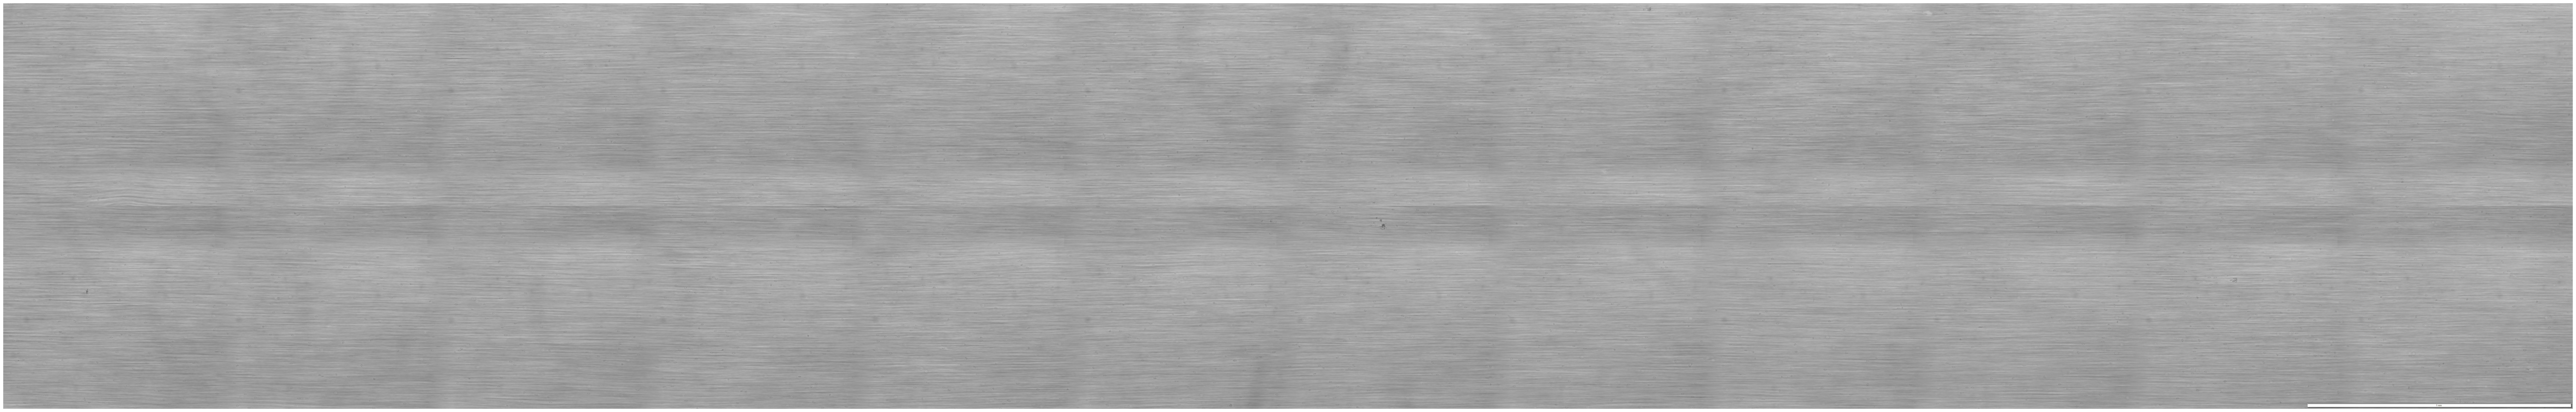

In [ ]:
#@title Show sRBC Raw Training Image

width = 100
height = 100
current_Directory = "motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/sRBC_Laminin_Raw_Training_Image/"
if '.ipynb_checkpoints' in os.listdir(current_Directory):
  os.rmdir("motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/sRBC_Laminin_Raw_Training_Image/.ipynb_checkpoints")

for file_Name in os.listdir(current_Directory):
  plt.figure()
  plt.figure(figsize = (width,height))
  plt.imshow(plt.imread(current_Directory + file_Name))
  plt.axis("off")
  plt.show()

The MBM video frames used for training look like:

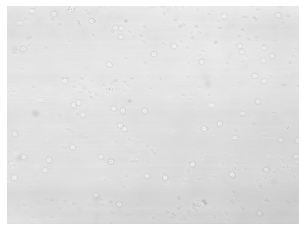

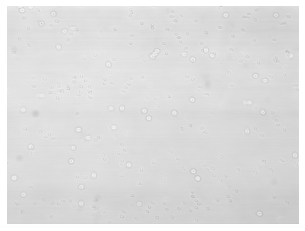

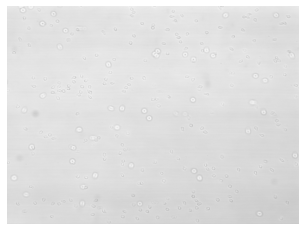

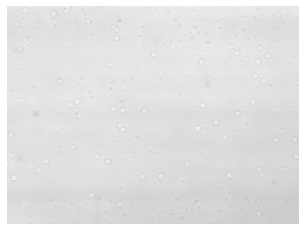

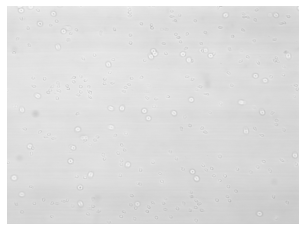

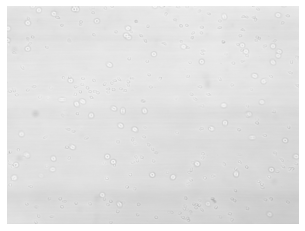

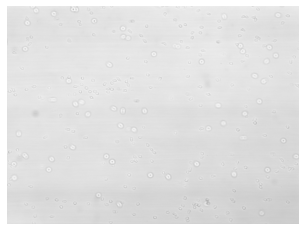

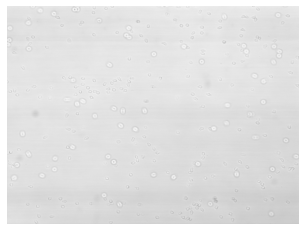

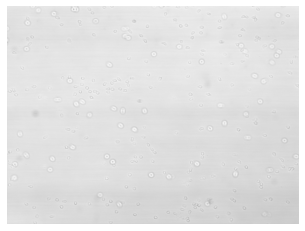

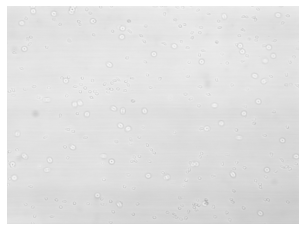

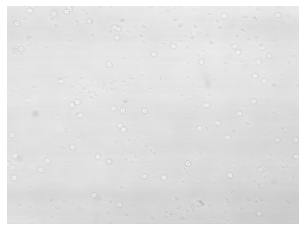

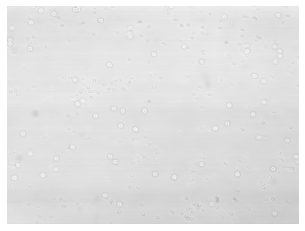

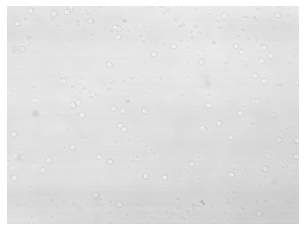

In [ ]:
#@title Show Car-T E-Selectin Training Frames

width = 100
height = 100
current_Directory = "motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/Car_T_E_Selectin_Training_Frames/"
if '.ipynb_checkpoints' in os.listdir(current_Directory):
  os.rmdir("motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/Car_T_E_Selectin_Training_Frames/.ipynb_checkpoints")

for file_Name in os.listdir(current_Directory):
  plt.figure()
  plt.imshow(plt.imread(current_Directory + file_Name))
  plt.axis("off")
  plt.show()

## Section 1.2: Manually Labeling Training Images

Which are frames 449,450,451,452,453,454,455,456,457,458,496,497,498 of a 500 frame video. **If you want to split your own MBM video into frames, you can use the code located at motion-blur-microscopy -> Training_Material -> Extract_Video_Frames -> Split_Video_Into_Frames**, which you can open from the github.

Now that we have the raw images that we want to use for training, we must manually label each pixel for each image. You can use whichever software you want for this, but we completed our pixel labeling using [GIMP](https://www.gimp.org/). 

Labeling should be completed by manually coloring every pixel in the training images that corresponds to an adhered object. It is easiest to color the pixels in a way that is easy to recall in (Red,Green,Blue) (R,G,B) format. Colors like: (1,0,0), (0,1,0), (0,0,1), (1,1,1) are good candidates. 

After labeling the sRBC training image, we produced:

<Figure size 432x288 with 0 Axes>

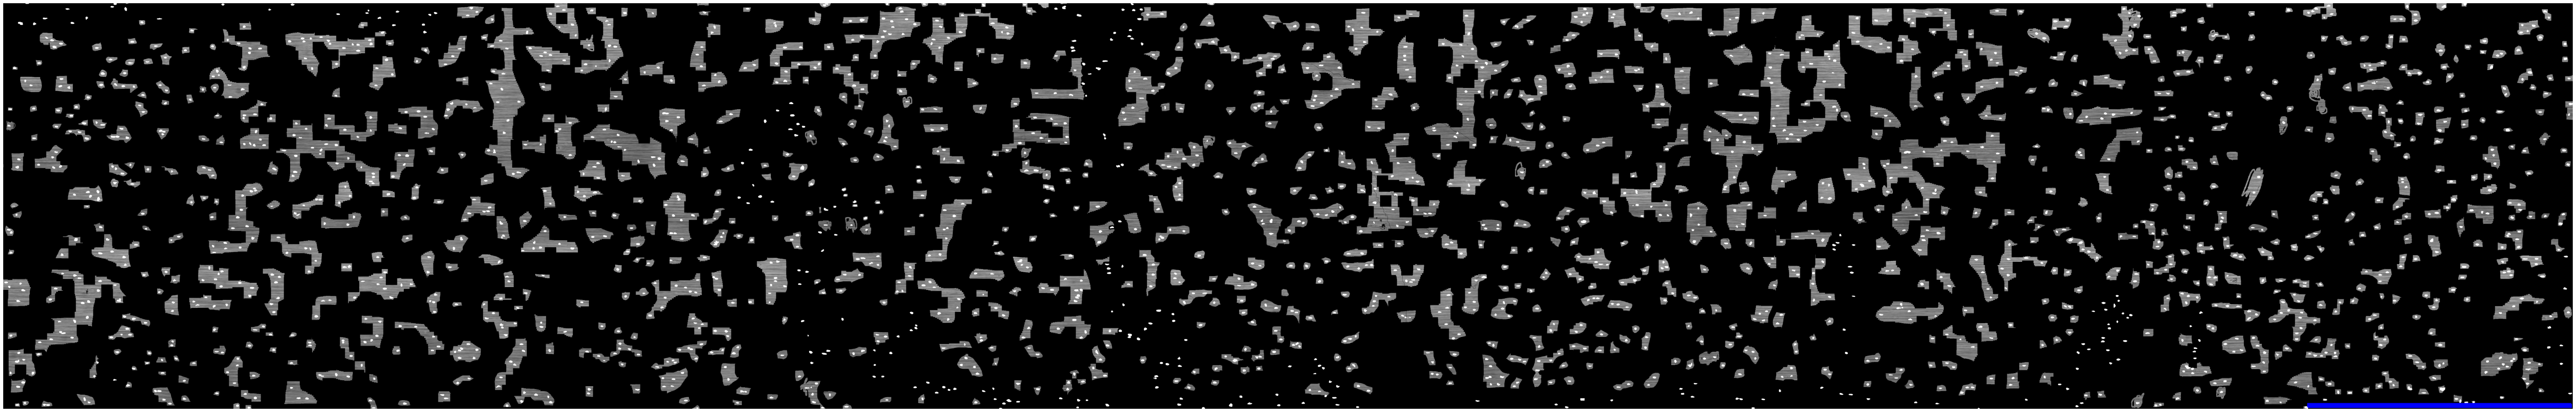

In [ ]:
#@title Show sRBC Training Image Partial Mask

width = 100
height = 100
current_Directory = "motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/sRBC_Laminin_Training_Image_Partial_Mask/"
if '.ipynb_checkpoints' in os.listdir(current_Directory):
  os.rmdir("motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/sRBC_Laminin_Training_Image_Partial_Mask/.ipynb_checkpoints")

for file_Name in os.listdir(current_Directory):
  plt.figure()
  plt.figure(figsize = (width,height))
  plt.imshow(plt.imread(current_Directory + file_Name))
  plt.axis("off")
  plt.show()

All adhered regions have been colored white (1,1,1) in this example. Note as well the extra coloring of the background as black (0,0,0). This background coloring is **not** necessary at this point, but was completed before deciding to fill in the background with a python script. There is also a length scale at the bottom right of the image, which we have colored blue.

After coloring the MBM video training frames, we produced:

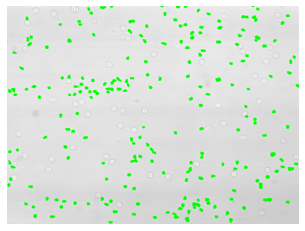

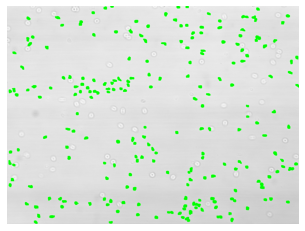

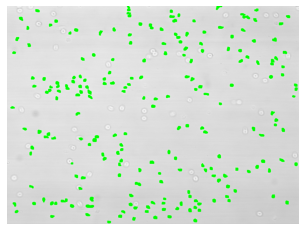

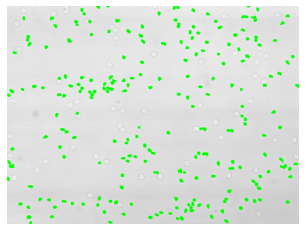

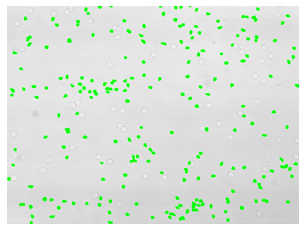

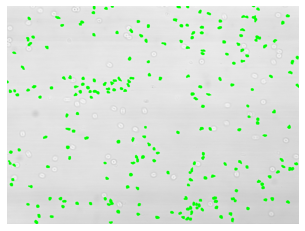

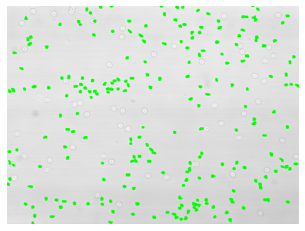

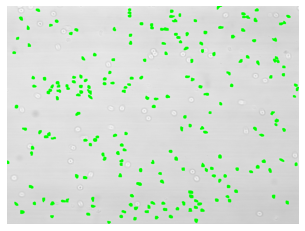

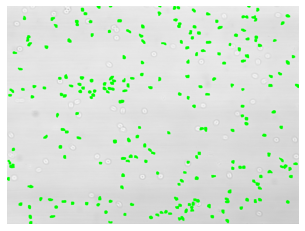

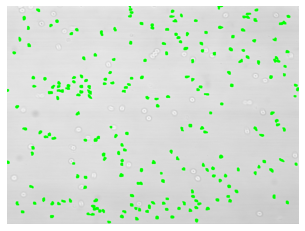

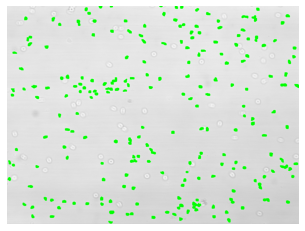

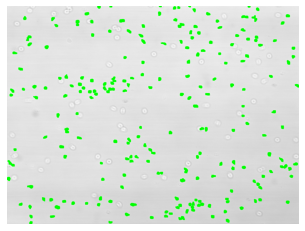

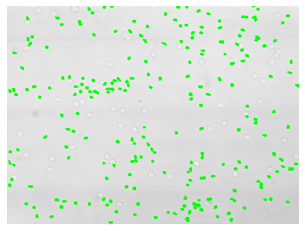

In [ ]:
#@title Show Car-T E-Selectin Training Frames Partial Masks

width = 100
height = 100
current_Directory = "motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/Car_T_E_Selectin_Training_Frames_Partial_Masks/"
if '.ipynb_checkpoints' in os.listdir(current_Directory):
  os.rmdir("motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/Car_T_E_Selectin_Training_Frames_Partial_Masks/.ipynb_checkpoints")

for file_Name in os.listdir(current_Directory):
  plt.figure()
  plt.imshow(plt.imread(current_Directory + file_Name))
  plt.axis("off")
  plt.show()

In this case, all adhered regions have been colored green (0,1,0), and none of the background pixels have been colored (A lesson from the unnecessary work done for the sRBC case).

We now want to color in all of the remaining background pixels for both the sRBC training image and Car-T E-Selectin training frames. Coloring the background is not strictly necesarry, but we find it helpful in visualizing the complete mask. Each of the background pixels can be colored in using GIMP, just like we did for the adhered regions. However, coloring in that many pixels manually is laborious and tedious, so, we implement a python script which colors in all of the background pixels automatically.

The python script for coloring in the background can be found in the motion-blur-microscopy directory at **motion-blur-microscopy -> Training_Material -> Complete_Mask_Coloring -> Training_Mask_Color_Completion** if you want to finish coloring your own partial masks.

After completely coloring the sRBC mask, we got:

<Figure size 432x288 with 0 Axes>

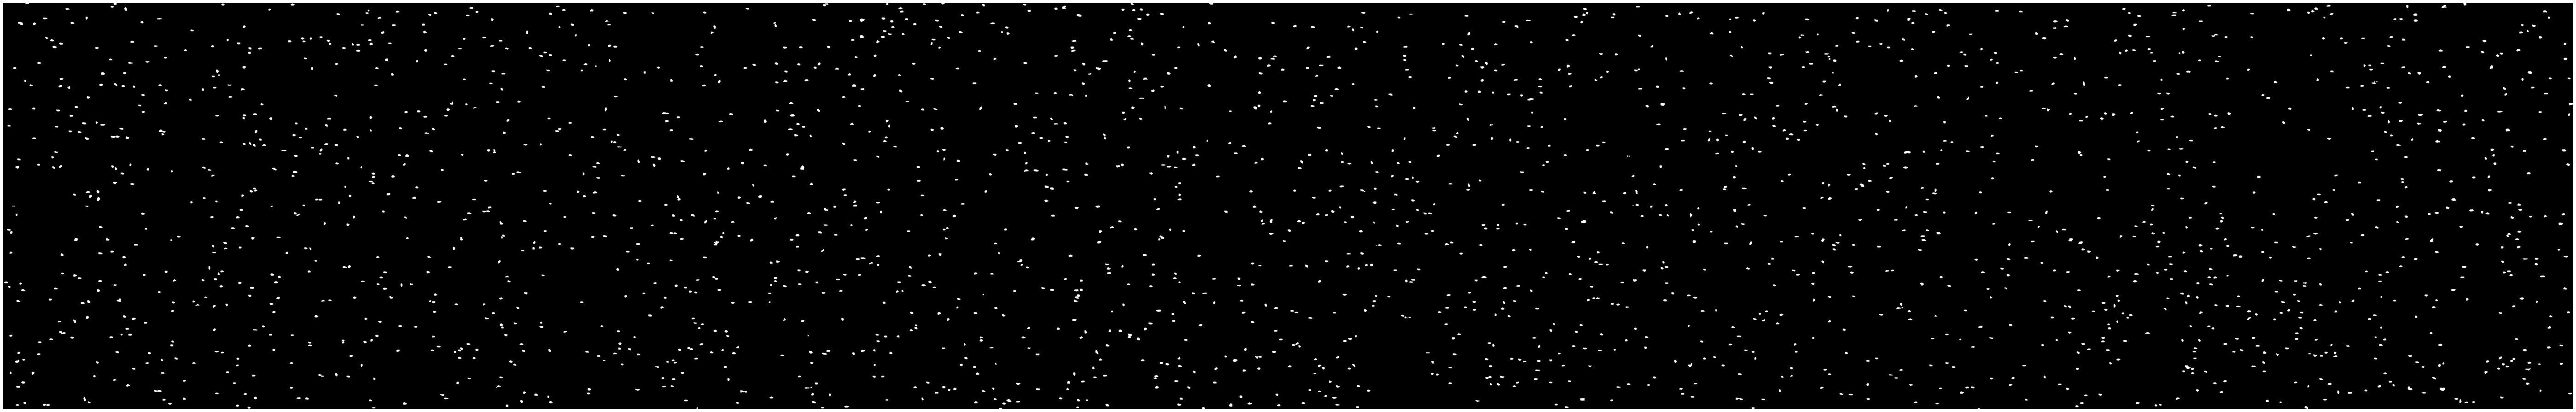

In [ ]:
#@title Show sRBC Training Full Mask
width = 100
height = 100
current_Directory = "motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/sRBC_Laminin_Training_Image_Full_Mask/"
if '.ipynb_checkpoints' in os.listdir(current_Directory):
  os.rmdir("motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/sRBC_Laminin_Training_Image_Full_Mask/.ipynb_checkpoints")

for file_Name in os.listdir(current_Directory):
  plt.figure()
  plt.figure(figsize = (width,height))
  plt.imshow(plt.imread(current_Directory + file_Name))
  plt.axis("off")
  plt.show()

The background for the image has now been colored black (0,0,0). Every pixel of the mask has now been colored.

After completely coloring all of the Car-T E-Selectin frame masks, we got:

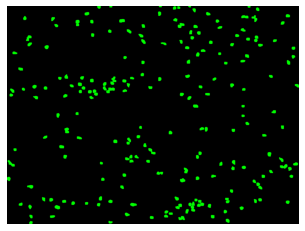

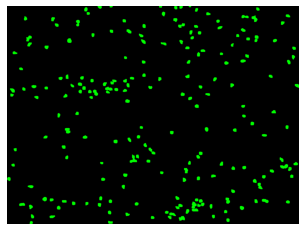

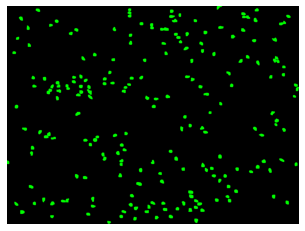

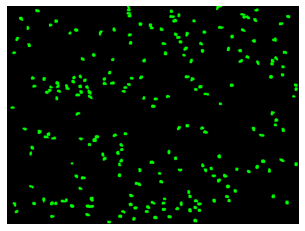

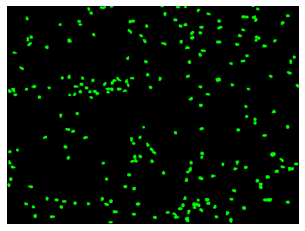

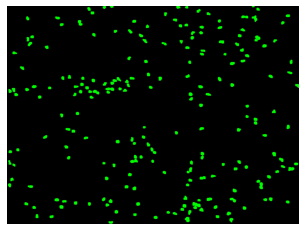

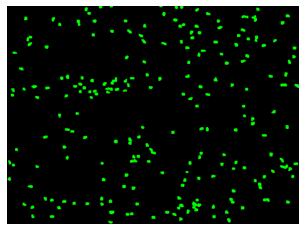

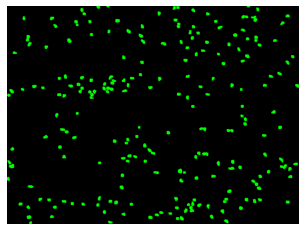

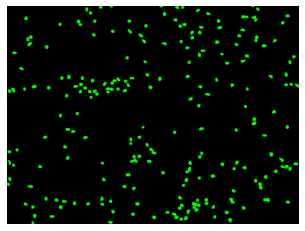

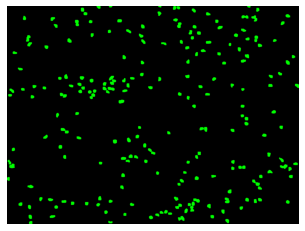

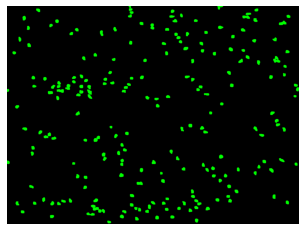

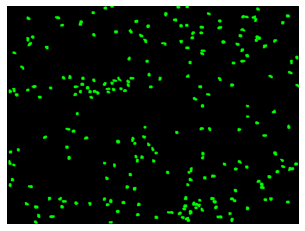

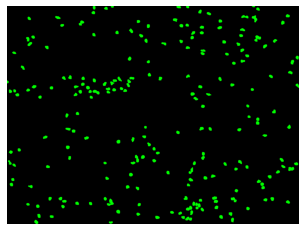

In [ ]:
#@title Show Car-T E-Selectin Training Frames Full Masks

width = 100
height = 100
current_Directory = "motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/Car_T_E_Selectin_Training_Frames_Full_Masks/"
if '.ipynb_checkpoints' in os.listdir(current_Directory):
  os.rmdir("motion-blur-microscopy/Training_Walkthrough_Material/Phase_One/Car_T_E_Selectin_Training_Frames_Full_Masks/.ipynb_checkpoints")

for file_Name in os.listdir(current_Directory):
  plt.figure()
  plt.imshow(plt.imread(current_Directory + file_Name))
  plt.axis("off")
  plt.show()

The background for all of the frames have now been colored black (0,0,0). Every pixel of each mask has now been colored and manually classified.

We now want to transform the colored masks into a form that can be used for training our SN. Specifically, we want to label each pixel in each mask as either 0 (Background) or 1 (Adhered).

## Prepare Masks For Training

At this stage, we are almost ready to train our SNs. First, however, we need to get our masks into the correct format for training. Specifically, each pixel in each mask should not be labeled as a color value, but rather, as a zero (background) or a one (adhered). Beyond this, we want our labeled mask to have three layers, because each MBM image or frame from an MBM video will have three color channels [R,G,B] as an input.

The code to complete this process can be found at **motion-blur-microscopy -> Training_Material -> Label_And_Layer_Masks -> Training_Mask_Label_And_Layer** in Github.

At this stage, let's take inventory of everything we have.


1.   Raw MBM images or MBM video frames for training.
2.   Partially colored and fully colored masks for each MBM training image and each MBM training frame.
3.   Binary labeled (0 or 1) masks for each MBM training image and each MBM training frame.
4.   A labeled and layered (three layers for three color channels) version of the masks.

To be clear, of the four sets of data above, the only ones necessary for training are items 1 and 4. Items 2 and 3 were generated as helpers to transition from 1 to 4. 

With both the original images and the correctly formatted masks in hand, we are just about ready to move onto training the phase one SNs. There is one last bit of preprocessing required. 



## 1.3: Preprocessing Labeled Images For Training

The SNs take in images of size 128x128, but we currently have MBM images and MBM video frames of unknown size (must be larger than 128x128). Thus, we will split the MBM images and MBM video frames (as well as their masks) into tiles of size 128x128. This process happens in two steps, first we split the original image and masks into tiles of size 150x150, and then we resize each of them to 128x128.

To complete this process, you can use the code located at **motion-blur-microscopy -> Training_Material -> Split_Into_Tiles -> Training_Split_Into_Tiles** in Github.

## 1.4: Training

After splitting the MBM training images and masks into tiles of the correct size (128x128), we can now train our network. To train the network, you can run the code located at **motion-blur-microscopy -> Training_Material -> Train_Phase_One -> Motion_Blur_Phase_One_Training**.

After training, you will have a .h5 file, which contains the architecture and weights of the network for use in analyzing new MBM images and MBM videos.



# Phase Two Training

## 2.1: Creating Training Images For Phase Two CN

Now that we have trained our phase one segmentation network, we turn our attention to training our phase two classification network. Our first task to complete for this is to generate a set of manually labeled data that can be used for training. 

The phase two CN will only be used to analyze Car-T P-Selectin MBM images and MBM videos. Both Car-T cells and RBCs adhere to the P-Selectin protean, necessitating a classification network to distinguish between the two cell types.

Our phase two classification network takes in 40x40 images of adhered objects in an MBM image or MBM video frame. As such, we want to extract a large number of these regions and manually classify them. To do this, we will use our trained phase one SN to extract adhered regions. 

Specifically, we will use the sRBC laminin network, which we think should generalize fairly well to Car-T P-Selectin MBM images and MBM videos. 

Before we do this, however, we will first convert our Car-T P-Selectin video into individual frames. We have done this once before. Recall the code located at motion-blur-microscopy -> Training_Material -> 

To extract your own 40x40 regions, you can use the code located at motion-blur-microscopy -> Training_Material -> Extract_Phase_Two_Regions -> Extract_Cell_Regions. 

Our regions were extracted from 52 frames of a 999 frame video. Specifically, frames 948-999 were used for training. 

Once you have extracted all of the regions which you wish to train on, you should then manually seperate them into two folder, one folder for cells of interest, and another folder for other.

Once you have manually classified each cell, we will then break the classified images into a train/validate/test subset. To do this, you can use the code located at motion-blur-microscopy -> Training_Material -> Create_Train_Split_Phase_Two -> Create_Train_Split

Now that we have all of our training data formatted correctly, we can train the phase two CN.

## 2.2 Training The Phase Two CN